In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
plt.style.use('bmh')

In [3]:
import re
import math

In [4]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_period_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from sklearn_pandas import DataFrameMapper

In [5]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train.drop('Survived', axis=1), df_test])

In [6]:
df_train_2 = pd.read_csv('data/train.csv')
df_test_2 = pd.read_csv('data/test.csv')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Larsson, Mr. August Viktor",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


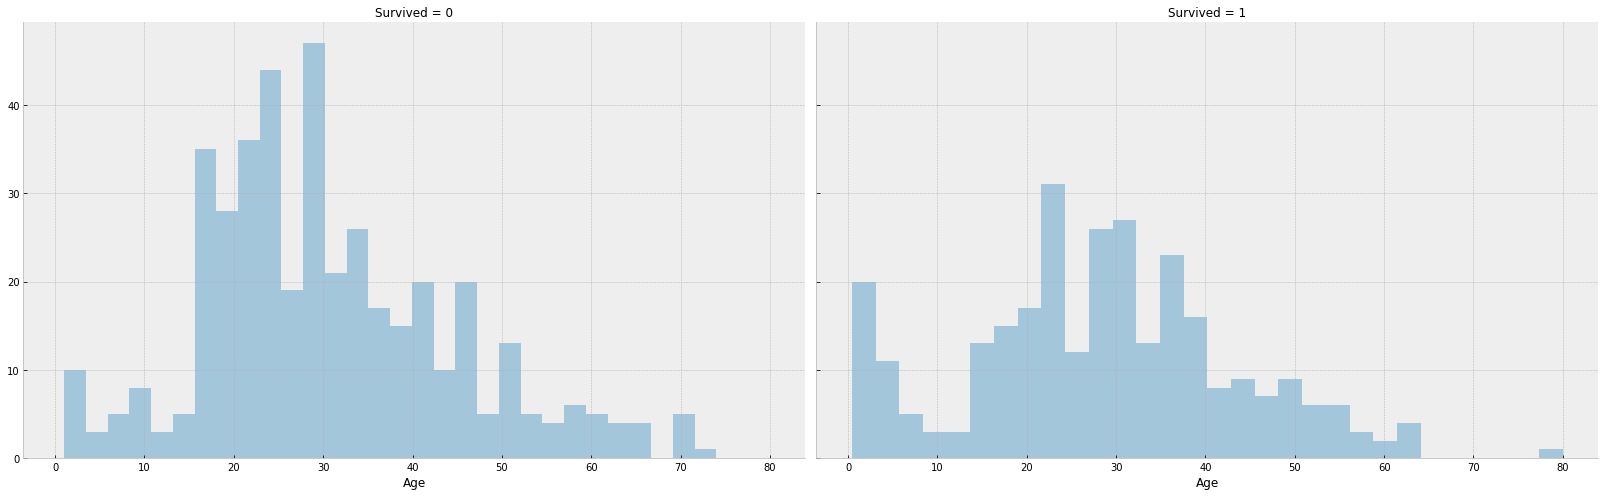

In [16]:
grid = sns.FacetGrid(df_train, col='Survived', height=7, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

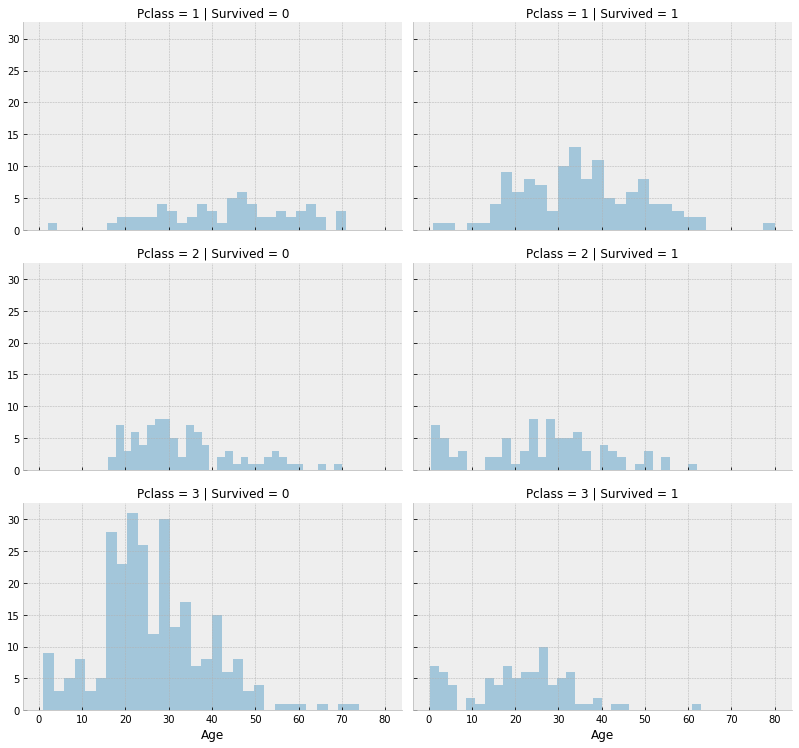

In [17]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

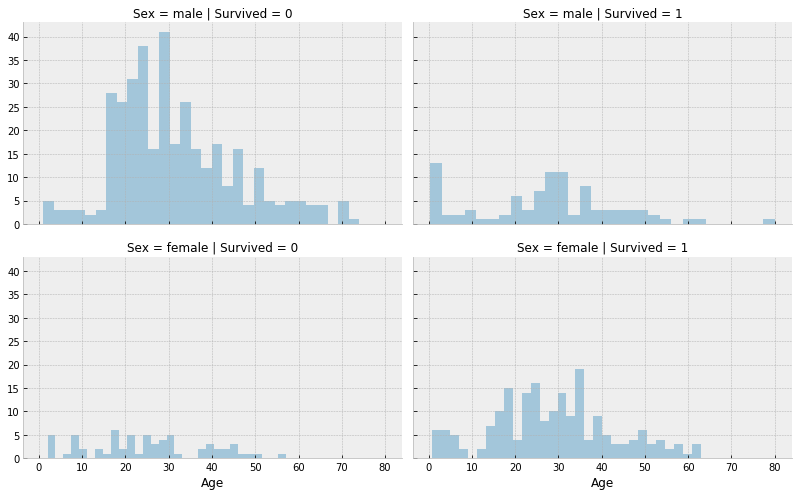

In [18]:
grid = sns.FacetGrid(df_train, col='Survived', row='Sex', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

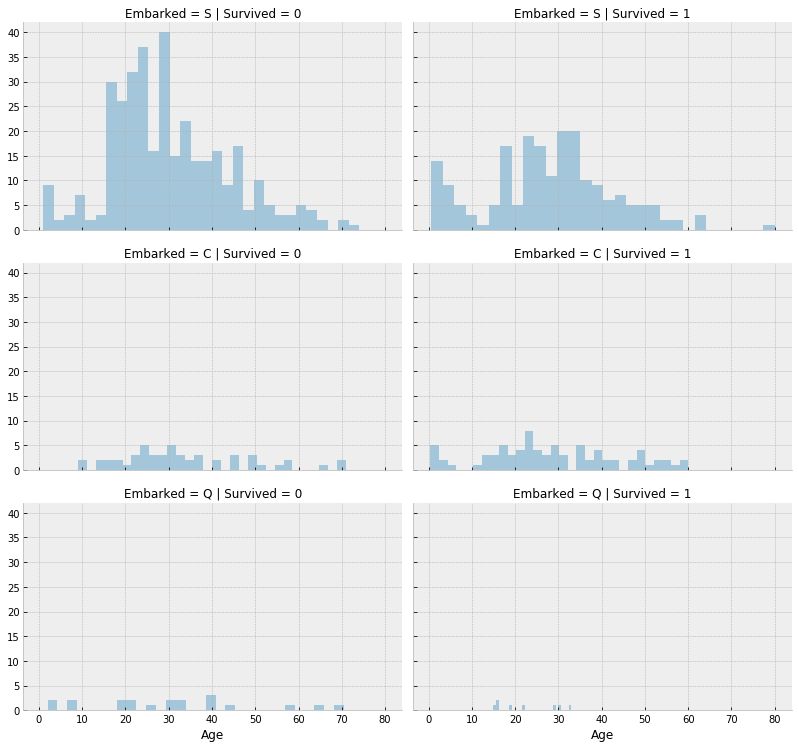

In [19]:
grid = sns.FacetGrid(df_train, col='Survived', row='Embarked', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


/Users/lality/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


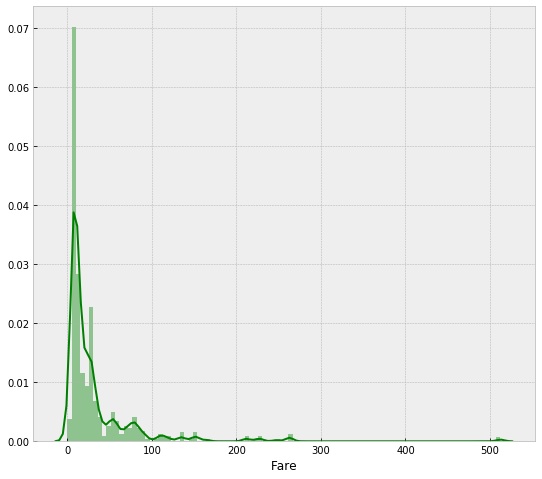

In [20]:
print(df_train['Fare'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['Fare'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [21]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


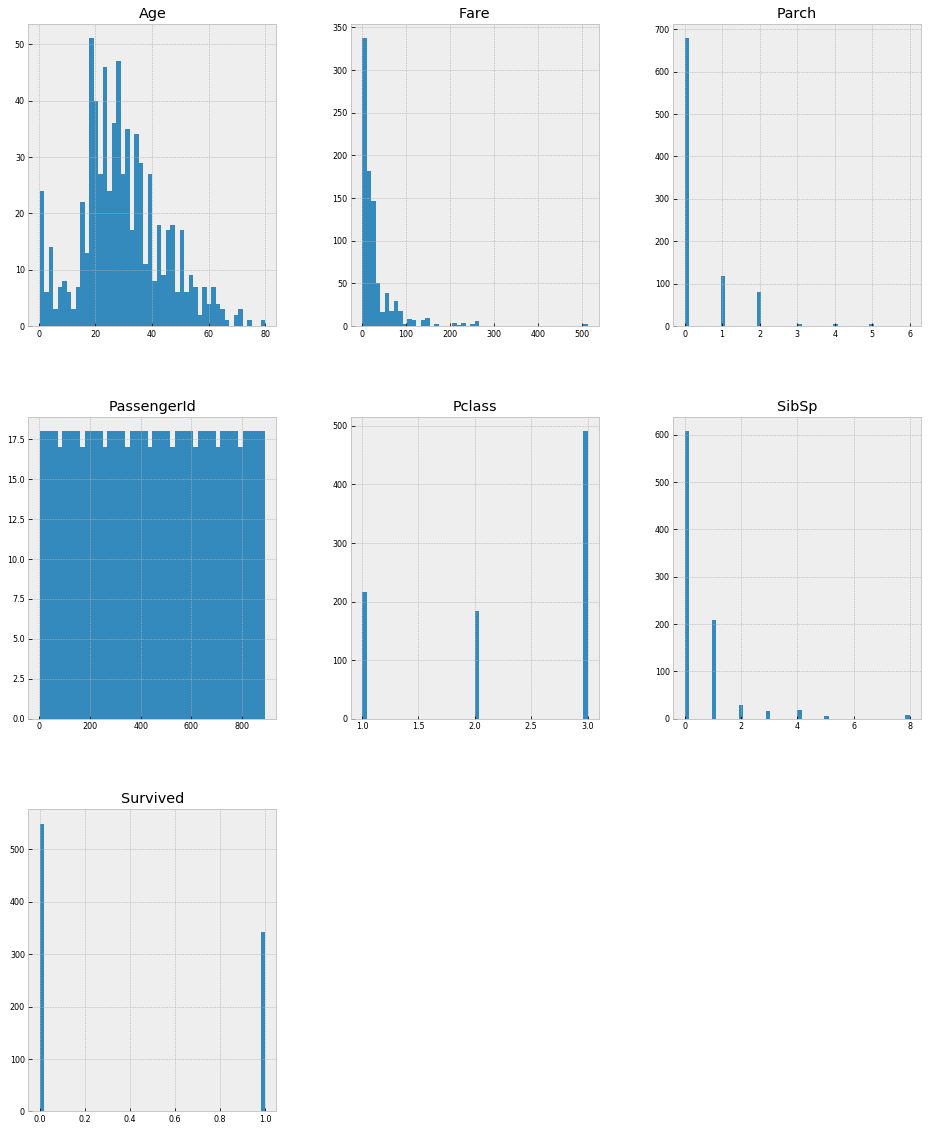

In [22]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

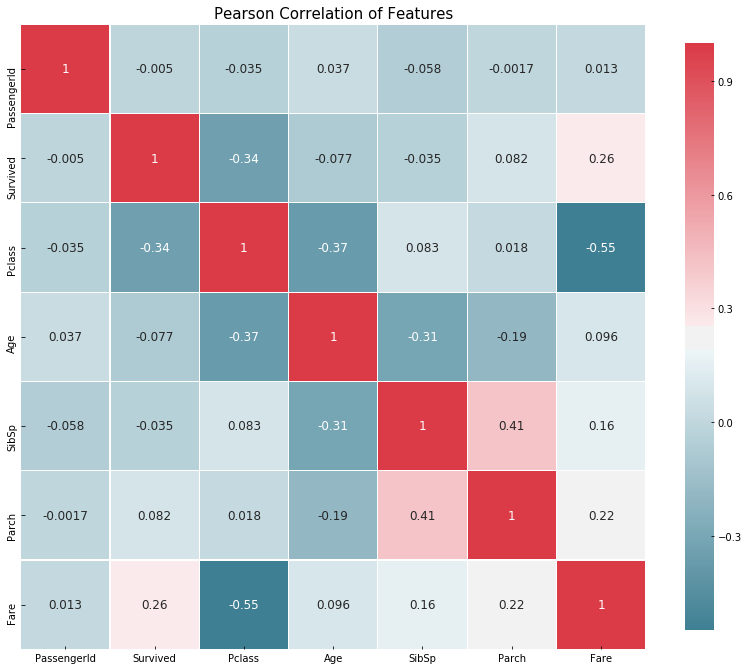

In [23]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_train)

In [25]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            

def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [226]:
def feature_mapping(df, remove_columns = [], mapper=None):
    train_cats(df)
    training = False
    dummies = []
    if mapper is None:
        mapper = {}
        training = True

    def extract_title_from_name(df):
        df = df.copy()
        df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        df.drop('Name', axis=1, inplace=True)
        return df
    
    def extract_prefix_from_ticket(df):
        df = df.copy()
        df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split(' ')[0].replace(".", "").replace("/", "") if not x.split(' ')[0].isdigit() else 'X')
        df.drop('Ticket', axis=1, inplace=True)
        return df
    
    def create_family_size(df):
        df = df.copy()
        df["Fsize"] = df["SibSp"] + df["Parch"] + 1
#         df["Fsize"] = pd.cut(df["Fsize"], bins=[0,1,4,20], labels=[0,1,2])
        df['Single'] = df['Fsize'].map(lambda x: 1 if x == 1 else 0)
        df['Double'] = df['Fsize'].map(lambda x: 1 if x == 2 else 0)
        df['Family'] = df['Fsize'].map(lambda x: 1 if 3 <= x <= 5 else 0)
        df['Extended_Family'] = df['Fsize'].map(lambda x: 1 if x >= 6 else 0)
        df.drop(['SibSp', 'Parch', 'Fsize'], axis=1, inplace=True)
        return df
    
    def map_title(df):
        df = df.copy()
        if training:
            title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 2, "Mme": 3,"Don": 9,"Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
            mapper['Title_Map'] = title_mapping
        else:
            title_mapping = mapper['Title_Map']
        df['Title'] = df['Title'].map(title_mapping)
        df['Title'] = df['Title'].fillna(0)
        return df
    
    def map_sex(df):
        df = df.copy()
        if training:
            sex_mapping = {"male": 1, "female": 2}
            mapper['Sex'] = sex_mapping
        else:
            sex_mapping = mapper['Sex']
        
        df['Sex'] = df['Sex'].map(sex_mapping)
        df['Sex'] = df['Sex'].fillna(0)
        return df

    def change_ticket_detail(df):
        df = df.copy()
        table_ticket = pd.DataFrame(df["Ticket_prefix"].value_counts())
        if training:   
            ticket_mapper = df.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count().to_dict('records')
            tmp = list(map(lambda x: tuple(x.values()), ticket_mapper))
            def map_ticket_fn(x):
                l = 0
                if 1 <= x[1] <= 10:
                    l = 1
                elif 11 <= x[1] <= 30:
                    l = 2
                elif 30 <= x[1] <= 100:
                    l = 3
                return (x[0], l)
            tmp_map = dict(list(map(map_ticket_fn, tmp)))
            mapper['Ticket_prefix'] = tmp_map
        else:
            tmp_map = mapper['Ticket_prefix']
#         df["Ticket_prefix"] = pd.cut(df["Ticket_prefix"], bins=[0,1,4,20], labels=[0,1,2])
        df['Ticket_prefix'] = df['Ticket_prefix'].map(tmp_map)
        df['Ticket_prefix'].fillna(0, inplace=True)
        return df
    
    def age_imputer(df): 
        if training:
            age_mapper = df[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median()
            mapper['age_mapper'] = age_mapper
        else:
            age_mapper = mapper['age_mapper']
        def age_imputer_fn(row):
            age = age_mapper.loc[(age_mapper['Pclass'] == row['Pclass']) & (age_mapper['Sex'] == row['Sex'])]['Age'] 
            if math.isnan(row['Age']):
                return np.asscalar(age)
            else:
                return float(row['Age'])
        df['Age'] = df.apply(age_imputer_fn, axis=1)
        df['Age'] = pd.cut(df['Age'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
        return df
    
    def normalize_fare(df):
        df = df.copy()
        if training:
            fare_map = df['Fare'].median()
            mapper['fare_map'] = fare_map
        else:
            fare_map = mapper['fare_map']
        df['Fare'].fillna(fare_map, inplace=True)
        df['Fare'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(int)
        return df
    
    def normalize_age(df):
        df['Age'] = df['Age'].apply(lambda x: np.log(x + 1))
        return df
    
    def map_embarked(df):
        df = df.copy()
        df["Embarked"] = df["Embarked"].fillna("S")
        if training:
            embarked = {'S': 1, 'C': 2, 'Q': 3} 
            mapper['embarked'] = embarked
        else:
            embarked = mapper['embarked']
        df['Embarked'] = df['Embarked'].map(embarked)
        return df
    
    
    def map_cabin(df):
        df = df.copy()
        def get_type_cabine(cabine):
            # Use a regular expression to search for a title. 
            cabine_search = re.search('\d+', cabine)
            # If the title exists, extract and return it.
            if cabine_search:
                num = cabine_search.group(0)
                if np.float64(num) % 2 == 0:
                    return '2'
                else:
                    return '1'
            return '0'
        df["CabinType"] = df["Cabin"].apply(get_type_cabine) 
        df["CabinType"] = df["CabinType"].astype(int)
        return df
    
    def sex_dummies(df):
        df = df.copy()
        df['is_male'] = df['Sex'].map(lambda x: 1 if x == 1 else 0)
        df['is_female'] = df['Sex'].map(lambda x: 1 if x == 2 else 0)
        dummies.extend(['is_male', 'Sex'])
        return df

    def embarked_dummies(df):
        df = df.copy()
        df['Embarked_S'] = df['Embarked'].map(lambda x: 1 if x == 1 else 0)
        df['Embarked_C'] = df['Embarked'].map(lambda x: 1 if x == 2 else 0)
        df['Embarked_Q'] = df['Embarked'].map(lambda x: 1 if x == 3 else 0)
        dummies.extend(['Embarked', 'Embarked_C'])
        return df
    
    def title_dummies(df):
        df = df.copy()
        df['Title_Rare'] = df['Title'].map(lambda x: 1 if x == 5 else 0)
        df['Title_Mrs'] = df['Title'].map(lambda x: 1 if x == 3 else 0)
        df['Title_Mr'] = df['Title'].map(lambda x: 1 if x == 1 else 0)
        df['Title_Miss'] = df['Title'].map(lambda x: 1 if x == 2 else 0)
        df['Title_Master'] = df['Title'].map(lambda x: 1 if x == 4 else 0)
        return df
    
    def remove_missing(df, columns_list, limit=0.0):
        """
        Deletes any column less than the provided limit
        """
        df = df.copy()
        matching_column = [column for column in df if df[column].count() / len(df) <= limit]
        columns_list.extend(matching_column)
        df.drop(columns_list, axis = 1, inplace=True)
        return df
    
    def remove_dummy_variable_trap(df):
        df = df.copy()
        df.drop(['Embarked', 'Sex', 'Embarked_C', 'is_male', 'Cabin'], axis=1, inplace=True)
        return df
    
    def add_new_col(df):
        df = df.copy()
        df['Age_Class'] = df.Age * df.Pclass
        return df

    df = extract_title_from_name(df)
    df = extract_prefix_from_ticket(df)
    df = create_family_size(df)
    df = map_title(df)
    df = map_sex(df)
    df = change_ticket_detail(df)
    df = normalize_fare(df)
    df = age_imputer(df)
    df = map_embarked(df)
    df = add_new_col(df)
#     df = map_cabin(df)
#     df = sex_dummies(df)
#     df = embarked_dummies(df)
#     df = title_dummies(df)
#     df = map_cabin(df)
#     df = remove_dummy_variable_trap(df)
    df = remove_missing(df, remove_columns)
    return df, mapper

In [230]:
df_train_2_2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Ticket_prefix,Single,Double,Family,Extended_Family,Age_Class
0,0,3,1,2,1,1,1.0,2,0,1,0,0,6
1,1,1,2,3,4,2,3.0,3,0,1,0,0,3
2,1,3,2,2,2,1,2.0,1,1,0,0,0,6
3,1,1,2,3,4,1,3.0,0,0,1,0,0,3
4,0,3,1,3,2,1,1.0,0,1,0,0,0,9


In [228]:
df_train_2_2, mapper2 = feature_mapping(df_train_2, ['PassengerId', 'Cabin'])

In [229]:
df_test_2_2, mapper2 = feature_mapping(df_test_2, ['PassengerId', 'Cabin'], mapper2)

In [110]:
df_train_2_1, mapper = feature_mapping(df_train_2, ['PassengerId', 'Cabin'])

In [36]:
df_test_2_1, mapper = feature_mapping(df_test_2, ['PassengerId', 'Cabin'], mapper)

In [231]:
print(df_train_2_2.info())
print("==" * 30)
print(df_test_2_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null int64
Age                891 non-null int64
Fare               891 non-null int64
Embarked           891 non-null int64
Title              891 non-null float64
Ticket_prefix      891 non-null int64
Single             891 non-null int64
Double             891 non-null int64
Family             891 non-null int64
Extended_Family    891 non-null int64
Age_Class          891 non-null int64
dtypes: float64(1), int64(12)
memory usage: 90.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int64
Fare               418 non-null int64
Embarked           418 non-null int64
Title              418 non-null int64
Ticket_pr

In [232]:
df_test_2_2.sample(10)

,Pclass,Sex,Age,Fare,Embarked,Title,Ticket_prefix,Single,Double,Family,Extended_Family,Age_Class
82,1,1,4,3,1,1,0.0,1,0,0,0,4
48,1,2,4,4,2,3,0.0,1,0,0,0,4
133,3,1,2,1,2,1,0.0,0,1,0,0,6
359,3,2,2,3,1,3,0.0,0,1,0,0,6
123,3,1,2,1,1,1,0.0,1,0,0,0,6
105,3,1,2,3,1,1,1.0,1,0,0,0,6
211,3,1,2,1,1,1,2.0,1,0,0,0,6
362,2,2,3,3,1,3,3.0,1,0,0,0,6
248,2,2,2,3,1,3,0.0,0,1,0,0,4
296,2,2,1,4,2,2,1.0,0,0,1,0,2


In [233]:
X = df_train_2_2.drop('Survived', axis=1)
y = df_train_2_2.Survived

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 712 samples.
Testing set has 179 samples.


In [236]:
from sklearn.metrics import fbeta_score, accuracy_score

In [237]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = None
    predictions_train = None
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], learner.predict(X_train[:300]))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], learner.predict(X_train[:300]), 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

GaussianNB trained on 712 samples.
{'train_time': 0.002405881881713867, 'pred_time': 0.0, 'acc_train': 0.78, 'acc_test': 0.776536312849162, 'f_train': 0.6878306878306878, 'f_test': 0.6997455470737913}
---------------------------------------
LogisticRegression trained on 712 samples.
{'train_time': 0.005548954010009766, 'pred_time': 0.0, 'acc_train': 0.8033333333333333, 'acc_test': 0.7988826815642458, 'f_train': 0.7250470809792843, 'f_test': 0.7365439093484419}
---------------------------------------
DecisionTreeClassifier trained on 712 samples.
{'train_time': 0.0035219192504882812, 'pred_time': 0.0, 'acc_train': 0.8966666666666666, 'acc_test': 0.8547486033519553, 'f_train': 0.9029345372460497, 'f_test': 0.8306709265175718}
---------------------------------------
RandomForestClassifier trained on 712 samples.
{'train_time': 0.11621618270874023, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.8966666666666666, 'acc_test': 0.8379888268156425, 'f_train': 0.8842105263157893, 'f_test': 0.8

/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.08840394020080566, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.87, 'acc_test': 0.8435754189944135, 'f_train': 0.8385093167701864, 'f_test': 0.8304498269896193}
---------------------------------------
AdaBoostClassifier trained on 712 samples.
{'train_time': 0.06382393836975098, 'pred_time': 0.0, 'acc_train': 0.8333333333333334, 'acc_test': 0.8156424581005587, 'f_train': 0.770712909441233, 'f_test': 0.7624633431085044}
---------------------------------------


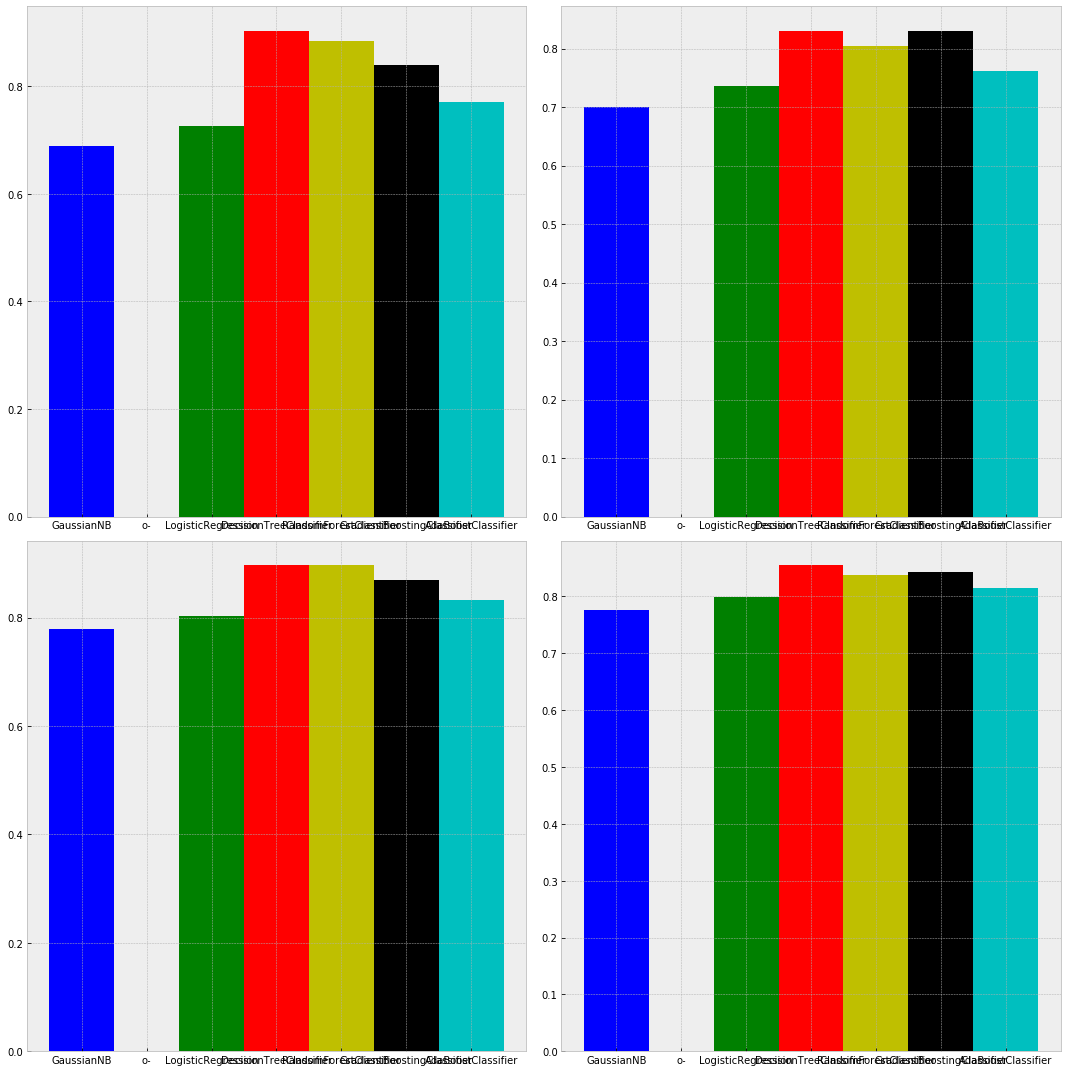

In [240]:
models = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(n_estimators=100),
             AdaBoostClassifier()]
samples_100 = len(X_train)
samples_10 = int(samples_100 * (0.1))
samples_1 = int(samples_10 * (0.1))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
results_dict = {}
colors = ['b','g','r', 'y', 'k', 'c', 'm', 'orange']
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")
for i, (key ,value) in enumerate(results_dict.items()):
    axes[0, 0].bar(key, value['f_train'], 'o-', color=colors[i],
             label="Training score")
    axes[0, 1].bar(key, value['f_test'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 0].bar(key, value['acc_train'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 1].bar(key, value['acc_test'], 'o-', color=colors[i],
             label="Training score")
fig.tight_layout()

In [241]:
models = [GradientBoostingClassifier(n_estimators=100, max_depth=2),
          GradientBoostingClassifier(n_estimators=100, max_depth=3),
          GradientBoostingClassifier(n_estimators=100, max_depth=4),
          GradientBoostingClassifier(n_estimators=100, max_depth=5),
          GradientBoostingClassifier(n_estimators=100, max_depth=7),
          GradientBoostingClassifier(n_estimators=100, max_depth=10)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.058182716369628906, 'pred_time': 0.0, 'acc_train': 0.85, 'acc_test': 0.8324022346368715, 'f_train': 0.8016032064128256, 'f_test': 0.7987220447284347}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.08864212036132812, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.87, 'acc_test': 0.8435754189944135, 'f_train': 0.8385093167701864, 'f_test': 0.8304498269896193}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.12173295021057129, 'pred_time': 7.152557373046875e-07, 'acc_train': 0.8833333333333333, 'acc_test': 0.8379888268156425, 'f_train': 0.8592132505175984, 'f_test': 0.8191126279863481}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.1647200584411621, 'pred_time': 0.0, 'acc_train': 0.9033333333333333, 'acc_test': 0.8547486033519553, 'f_train': 

In [222]:
models = [GradientBoostingClassifier(n_estimators=100, max_depth=2),
          GradientBoostingClassifier(n_estimators=100, max_depth=3),
          GradientBoostingClassifier(n_estimators=100, max_depth=4),
          GradientBoostingClassifier(n_estimators=100, max_depth=5),
          GradientBoostingClassifier(n_estimators=100, max_depth=7),
          GradientBoostingClassifier(n_estimators=100, max_depth=10)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.055991172790527344, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.86, 'acc_test': 0.8268156424581006, 'f_train': 0.8181818181818182, 'f_test': 0.7886435331230285}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.08486580848693848, 'pred_time': 0.0, 'acc_train': 0.9033333333333333, 'acc_test': 0.8603351955307262, 'f_train': 0.9041394335511982, 'f_test': 0.8532423208191127}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.11986398696899414, 'pred_time': 0.0, 'acc_train': 0.95, 'acc_test': 0.8603351955307262, 'f_train': 0.9572301425661914, 'f_test': 0.8471760797342192}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.16813302040100098, 'pred_time': 0.0, 'acc_train': 0.9733333333333334, 'acc_test': 0.8715083798882681, 'f_train': 0.978473581213307

In [245]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [246]:
y_pred = clf.predict(df_test_2_2)

In [244]:
submission = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [247]:
submission.to_csv('submission1.csv', index=False)

In [248]:
submission.Survived.sum()

147

In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# estimators = [100, 200, 500]
# rate = [0.01, 0.03, 0.1, 0.3, 1.0]

parameters = {
                'max_depth': [3, 4, 5, 10],
                'n_estimators': [80, 100, 200, 500],
                'learning_rate': [0.1, 0.15, 0.2]
            }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, n_jobs=5, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8547
F-score on testing data: 0.8418

Optimized Model
------
Final accuracy score on the testing data: 0.8436
Final F-score on the testing data: 0.8147


/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [236]:
best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [266]:
best_clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [267]:
y_pred = best_clf.predict(df_test_2_2)

In [268]:
submission = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [269]:
submission.to_csv('old5_submission.csv', index=False)

In [270]:
submission.Survived.sum()

149

In [290]:
W = np.random.randn(4, 4, 3)

In [296]:
W[..., 2]

array([[-0.48646893,  0.51525323,  0.24409443,  1.3333027 ],
       [ 0.01743299, -0.33661377,  0.13886565,  1.48488278],
       [-0.58765466,  0.29014239, -0.71036632,  1.23399001],
       [ 1.30204746,  1.20075727,  0.0948755 , -1.63760645]])

In [295]:
W[2]

array([[-0.30552072,  0.65105745, -0.58765466],
       [ 0.154117  , -0.25749421,  0.29014239],
       [ 0.7047065 ,  0.12462863, -0.71036632],
       [-0.18988417, -0.02159708,  1.23399001]])

In [280]:
W

array([[[ 0.62364118,  0.95772839,  1.47217058],
        [ 0.55804128, -0.02599418, -0.40217978],
        [ 0.34930483, -2.20910346, -0.52854514],
        [-0.76484062, -0.20857068,  0.12880395]],

       [[ 1.38498607, -0.81314505,  0.31746995],
        [-0.13278511, -0.04367427, -3.76142092],
        [ 0.15160487,  0.47675891, -0.1261751 ],
        [ 0.96520521,  1.4857187 ,  1.50310708]],

       [[-1.08993717,  0.24624663,  0.61960177],
        [-0.51067115,  0.64220151,  0.77708079],
        [-0.13277493, -0.51763876,  0.3836372 ],
        [-0.25558933,  0.58451759, -0.25795789]],

       [[-0.30296051, -0.15059837, -0.33454277],
        [-1.01101564, -1.29549475, -1.15456873],
        [ 0.11421677,  1.19687475, -0.01207211],
        [ 0.73497366, -0.46972333,  0.12213668]]])

In [281]:
W = np.random.randn(4, 3)

In [282]:
W

array([[ 0.51923161, -0.68801064,  1.37768195],
       [-0.80528673,  1.21127575, -0.66769534],
       [-1.73580624, -0.31399478,  1.91347781],
       [ 0.27698353,  0.73711353, -1.12671102]])

In [288]:
W[:, 2]

array([ 1.37768195, -0.66769534,  1.91347781, -1.12671102])